# Plot CTD data 

In [35]:
import os
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
from scipy.interpolate import interp1d
from datetime import datetime
import cmocean


%matplotlib widget 

### Parameters

Specify the path to the data folder and the date of the campaign:

In [36]:
data_folder='../data/Profiles/RBR_66131'
date_campaign='20250605'
#filenames=["L2_CTD_rbr_237207_20250605_1136_20250605_100637.nc"]
filenames=os.listdir(os.path.join(data_folder,date_campaign,'Level2'))

Parameters of the plot

In [37]:
varnames=["Temp","Cond","DO_mg","sat"]
varlabels=["Temp [°C]","Cond [mS/cm]", "DO [mg/l]","O2 sat [%]"]
dz_top=0.5 # [m], to remove near the surface
dz_bot=0.5 # [m], to remove at the bottom
ctd_data=[]

### Load the Level-2 data 

In [38]:
for k,file in enumerate(filenames):
    nc=netCDF4.Dataset(os.path.join(data_folder,date_campaign,'Level2',file)) 
    time_num=nc.variables["time"][:].data
    time_date=time_num.astype("datetime64[s]").astype(datetime)
    dict_ctd={"filename":file,"xcoord":getattr(nc, 'X Coordinate (CH1903)') ,"ycoord":getattr(nc, 'Y Coordinate (CH1903)') ,
              "time_start":time_date[0],"depth":nc.variables["depth"][:].data,"time_num":time_num,"time_date":time_date}
    
    for kv in range(len(varnames)): 
        vardata=nc.variables[varnames[kv]][:].data
        if varnames[kv]+"_qual" in nc.variables:
            vardata[nc.variables[varnames[kv]+"_qual"][:]>0]=np.nan
        vardata[dict_ctd["depth"]<dz_top]=np.nan
        vardata[dict_ctd["depth"]>(np.nanmax(dict_ctd["depth"])-dz_bot)]=np.nan
        dict_ctd[varnames[kv]]=vardata
    ctd_data.append(dict_ctd)
    nc.close()

### Plot the profiles

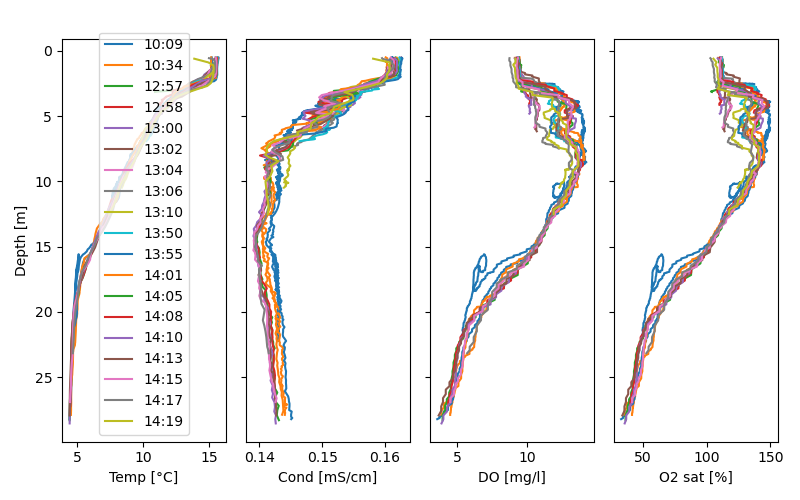

In [39]:
fig,ax=plt.subplots(1,len(varnames),figsize=(8,5),sharey=True)
leg=[]

for kprof in range(len(ctd_data)):
    for kv in range(len(varnames)):
        ax[kv].plot(ctd_data[kprof][varnames[kv]],ctd_data[kprof]["depth"])
    leg.append(ctd_data[kprof]["time_start"].strftime("%H:%M"))

ax[0].set_ylabel('Depth [m]')
ax[0].invert_yaxis()
for kv in range(len(varnames)):
    ax[kv].set_xlabel(varlabels[kv])
ax[0].legend(leg)
fig.set_tight_layout(True)